# Text Analytics Assignment on Word Cloud

## Objective:

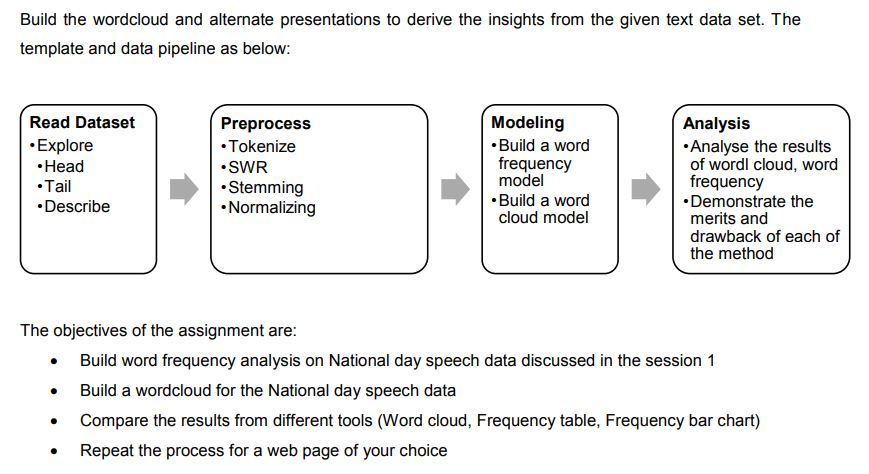

### The latest data for national day speech is available at:
https://graphics.straitstimes.com/STI/STIMEDIA/Interactives/2018/08/ndr-speech-analysis-2018/

In [1]:
#Importing necessary libraries

import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Importing Chrome Driver
driver = webdriver.Chrome("C:/Intel/chromedriver_win32/chromedriver.exe")

#Getting the content of the URL
driver.get("https://graphics.straitstimes.com/STI/STIMEDIA/Interactives/2018/08/ndr-speech-analysis-2018/")
res = driver.execute_script("return document.documentElement.outerHTML")
driver.quit()
soup = BeautifulSoup(res, 'lxml')


In [4]:
#prettify() method will turn a Beautiful Soup parse tree into a nicely formatted Unicode string 
print(soup.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   National Day Rally 2018: Explore PM Lee’s transcript | The Straits Times
  </title>
  <meta content="National Day Rally 2018: Explore PM Lee’s transcript" name="title"/>
  <meta content="Prime Minister Lee Hsien Loong delivered the 2018 National Day Rally speech on Aug 19. What were the hot topics and most-used words? Find out with this speech analysis." name="description"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="True" name="HandheldFriendly"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/>
  <meta content="ST" name="apple-mobile-web-app-title"/>
  <meta content="The Straits Times" name="application-name"/>
  <meta content="#0c2b57" name="msapplication-TileColor"/>
  <meta content="#0c2b57" name="theme-color"/>
  <meta content="Singapore news" property="article:section"/>
 

In [5]:
speech_text = soup.find('div', {'class': 'div_content_text_filter'})
speech_text.getText()

'Good evening again. My fellow Singaporeans. We have had a busy year, both at home and internationally. Two months ago, we hosted the first ever meeting between a US President and a DPRK Chairman, Mr Donald Trump and Mr Kim Jong Un. Singapore was just the host; we were not involved in the discussions. Still, we had a big responsibility to ensure that the Summit proceeded smoothly and safely. Why did the US and the DPRK choose Singapore to host the Summit? I think they considered us a serious and reliable partner. We are friendly and straight with all parties. And both trusted us to have the infrastructure and capability to provide a safe and secure environment. It was a daunting task, but we rose to the challenge. We welcomed our guests with ‘Uniquely Singapore’ touches of warmth and hospitality. You may have seen the Sentosa cannons, barrels decorated with flowers and olive branches. SDC has good staff. We found and assigned Korean-speaking officers to the North Korean delegation. We 

In [6]:
type(speech_text)

bs4.element.Tag

In [7]:
speech_text = speech_text.getText()

In [8]:
type(speech_text)

str

In [9]:
len(speech_text)

54641

In [10]:
sentence_split = speech_text.split(".")
print(sentence_split)

['Good evening again', ' My fellow Singaporeans', ' We have had a busy year, both at home and internationally', ' Two months ago, we hosted the first ever meeting between a US President and a DPRK Chairman, Mr Donald Trump and Mr Kim Jong Un', ' Singapore was just the host; we were not involved in the discussions', ' Still, we had a big responsibility to ensure that the Summit proceeded smoothly and safely', ' Why did the US and the DPRK choose Singapore to host the Summit? I think they considered us a serious and reliable partner', ' We are friendly and straight with all parties', ' And both trusted us to have the infrastructure and capability to provide a safe and secure environment', ' It was a daunting task, but we rose to the challenge', ' We welcomed our guests with ‘Uniquely Singapore’ touches of warmth and hospitality', ' You may have seen the Sentosa cannons, barrels decorated with flowers and olive branches', ' SDC has good staff', ' We found and assigned Korean-speaking offi

### Finding out the distribution of sentence lengths in the

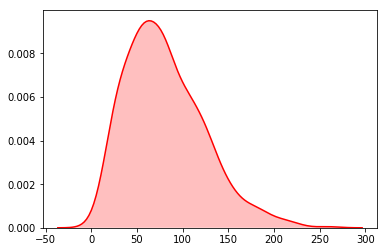

In [11]:
import seaborn as sns
line_lengths = [len(sentence) for sentence in sentence_split]
p = sns.kdeplot(line_lengths, shade=True, color='red')

In [12]:
comma_split = []
for sent in sentence_split:
    temp = sent.split(',')
    comma_split.append(temp)
print(comma_split)

[['Good evening again'], [' My fellow Singaporeans'], [' We have had a busy year', ' both at home and internationally'], [' Two months ago', ' we hosted the first ever meeting between a US President and a DPRK Chairman', ' Mr Donald Trump and Mr Kim Jong Un'], [' Singapore was just the host; we were not involved in the discussions'], [' Still', ' we had a big responsibility to ensure that the Summit proceeded smoothly and safely'], [' Why did the US and the DPRK choose Singapore to host the Summit? I think they considered us a serious and reliable partner'], [' We are friendly and straight with all parties'], [' And both trusted us to have the infrastructure and capability to provide a safe and secure environment'], [' It was a daunting task', ' but we rose to the challenge'], [' We welcomed our guests with ‘Uniquely Singapore’ touches of warmth and hospitality'], [' You may have seen the Sentosa cannons', ' barrels decorated with flowers and olive branches'], [' SDC has good staff'], 

## Tokenization

Tokenization is the process of breaking up the given text into smaller units called tokens. The tokens may be words or number or punctuation mark. Tokenization does this task by locating word boundaries. Ending point of a word and beginning of the next word is called word boundaries.

In [13]:
# splitting each sentence to get words
tokens = [items.split() for item in comma_split for items in item]
print(tokens[:5])

[['Good', 'evening', 'again'], ['My', 'fellow', 'Singaporeans'], ['We', 'have', 'had', 'a', 'busy', 'year'], ['both', 'at', 'home', 'and', 'internationally'], ['Two', 'months', 'ago']]


### Distribution of the typical sentence word counts

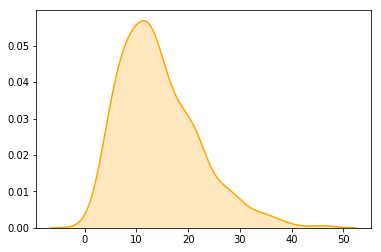

In [14]:
total_tokens_per_sentence = [len(items.split()) for items in sentence_split]
p = sns.kdeplot(total_tokens_per_sentence, shade=True, color='orange')

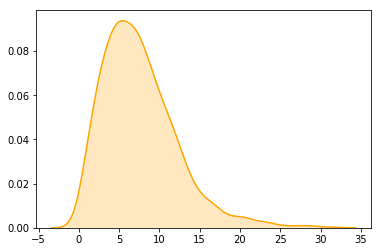

In [15]:
total_tokens_per_comma_sentence = [len(item.split()) for items in comma_split for item in items]
p = sns.kdeplot(total_tokens_per_comma_sentence, shade=True, color='orange')

In [16]:
#Use sentence tokenizer from NLTK
import nltk
from nltk.tokenize import sent_tokenize
sent_tokenize_list = sent_tokenize(speech_text)
len(sent_tokenize_list)
print(sent_tokenize_list)

678

['Good evening again.', 'My fellow Singaporeans.', 'We have had a busy year, both at home and internationally.', 'Two months ago, we hosted the first ever meeting between a US President and a DPRK Chairman, Mr Donald Trump and Mr Kim Jong Un.', 'Singapore was just the host; we were not involved in the discussions.', 'Still, we had a big responsibility to ensure that the Summit proceeded smoothly and safely.', 'Why did the US and the DPRK choose Singapore to host the Summit?', 'I think they considered us a serious and reliable partner.', 'We are friendly and straight with all parties.', 'And both trusted us to have the infrastructure and capability to provide a safe and secure environment.', 'It was a daunting task, but we rose to the challenge.', 'We welcomed our guests with ‘Uniquely Singapore’ touches of warmth and hospitality.', 'You may have seen the Sentosa cannons, barrels decorated with flowers and olive branches.', 'SDC has good staff.', 'We found and assigned Korean-speaking o

In [17]:
#Alternative method to tokenize sentences. Here we can specify different languages for tokenization

import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sent_tokenize_list = tokenizer.tokenize(speech_text)
len(sent_tokenize_list)
print(sent_tokenize_list)

678

['Good evening again.', 'My fellow Singaporeans.', 'We have had a busy year, both at home and internationally.', 'Two months ago, we hosted the first ever meeting between a US President and a DPRK Chairman, Mr Donald Trump and Mr Kim Jong Un.', 'Singapore was just the host; we were not involved in the discussions.', 'Still, we had a big responsibility to ensure that the Summit proceeded smoothly and safely.', 'Why did the US and the DPRK choose Singapore to host the Summit?', 'I think they considered us a serious and reliable partner.', 'We are friendly and straight with all parties.', 'And both trusted us to have the infrastructure and capability to provide a safe and secure environment.', 'It was a daunting task, but we rose to the challenge.', 'We welcomed our guests with ‘Uniquely Singapore’ touches of warmth and hospitality.', 'You may have seen the Sentosa cannons, barrels decorated with flowers and olive branches.', 'SDC has good staff.', 'We found and assigned Korean-speaking o

In [18]:
#Word tokenizer
from nltk.tokenize import word_tokenize
word_tokenize(speech_text)

['Good',
 'evening',
 'again',
 '.',
 'My',
 'fellow',
 'Singaporeans',
 '.',
 'We',
 'have',
 'had',
 'a',
 'busy',
 'year',
 ',',
 'both',
 'at',
 'home',
 'and',
 'internationally',
 '.',
 'Two',
 'months',
 'ago',
 ',',
 'we',
 'hosted',
 'the',
 'first',
 'ever',
 'meeting',
 'between',
 'a',
 'US',
 'President',
 'and',
 'a',
 'DPRK',
 'Chairman',
 ',',
 'Mr',
 'Donald',
 'Trump',
 'and',
 'Mr',
 'Kim',
 'Jong',
 'Un',
 '.',
 'Singapore',
 'was',
 'just',
 'the',
 'host',
 ';',
 'we',
 'were',
 'not',
 'involved',
 'in',
 'the',
 'discussions',
 '.',
 'Still',
 ',',
 'we',
 'had',
 'a',
 'big',
 'responsibility',
 'to',
 'ensure',
 'that',
 'the',
 'Summit',
 'proceeded',
 'smoothly',
 'and',
 'safely',
 '.',
 'Why',
 'did',
 'the',
 'US',
 'and',
 'the',
 'DPRK',
 'choose',
 'Singapore',
 'to',
 'host',
 'the',
 'Summit',
 '?',
 'I',
 'think',
 'they',
 'considered',
 'us',
 'a',
 'serious',
 'and',
 'reliable',
 'partner',
 '.',
 'We',
 'are',
 'friendly',
 'and',
 'straight',


In [19]:
#Punctuation based tokenizer
from nltk.tokenize import WordPunctTokenizer
word_punct_tokenizer = WordPunctTokenizer()
word_punct_tokenizer.tokenize(speech_text)

['Good',
 'evening',
 'again',
 '.',
 'My',
 'fellow',
 'Singaporeans',
 '.',
 'We',
 'have',
 'had',
 'a',
 'busy',
 'year',
 ',',
 'both',
 'at',
 'home',
 'and',
 'internationally',
 '.',
 'Two',
 'months',
 'ago',
 ',',
 'we',
 'hosted',
 'the',
 'first',
 'ever',
 'meeting',
 'between',
 'a',
 'US',
 'President',
 'and',
 'a',
 'DPRK',
 'Chairman',
 ',',
 'Mr',
 'Donald',
 'Trump',
 'and',
 'Mr',
 'Kim',
 'Jong',
 'Un',
 '.',
 'Singapore',
 'was',
 'just',
 'the',
 'host',
 ';',
 'we',
 'were',
 'not',
 'involved',
 'in',
 'the',
 'discussions',
 '.',
 'Still',
 ',',
 'we',
 'had',
 'a',
 'big',
 'responsibility',
 'to',
 'ensure',
 'that',
 'the',
 'Summit',
 'proceeded',
 'smoothly',
 'and',
 'safely',
 '.',
 'Why',
 'did',
 'the',
 'US',
 'and',
 'the',
 'DPRK',
 'choose',
 'Singapore',
 'to',
 'host',
 'the',
 'Summit',
 '?',
 'I',
 'think',
 'they',
 'considered',
 'us',
 'a',
 'serious',
 'and',
 'reliable',
 'partner',
 '.',
 'We',
 'are',
 'friendly',
 'and',
 'straight',


In [20]:
#Compute the word frequency with Split
def wordfreq(str):
    word_freq={}
    for tok in str.split():
        if tok.lower() in word_freq:
            word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
    return word_freq

In [21]:
new_tokens = wordfreq(speech_text) 

In [22]:
import operator
sorted_d = sorted(new_tokens.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])

[('the', 429), ('and', 323), ('to', 268), ('a', 183), ('we', 164), ('of', 139), ('will', 138), ('in', 132), ('you', 132), ('is', 124), ('for', 113), ('have', 101), ('are', 101), ('it', 85), ('be', 73), ('that', 72), ('they', 66), ('their', 66), ('our', 65), ('i', 63), ('this', 63), ('with', 61), ('not', 60), ('can', 59), ('but', 49)]


<FreqDist with 2646 samples and 9582 outcomes>
[('the', 429), ('and', 323), ('to', 268), ('a', 183), ('we', 164), ('of', 139), ('will', 138), ('in', 132), ('you', 132), ('is', 124), ('for', 113), ('have', 101), ('are', 101), ('it', 85), ('be', 73), ('that', 72), ('they', 66), ('their', 66), ('our', 65), ('i', 63), ('this', 63), ('with', 61), ('not', 60), ('can', 59), ('but', 49)]


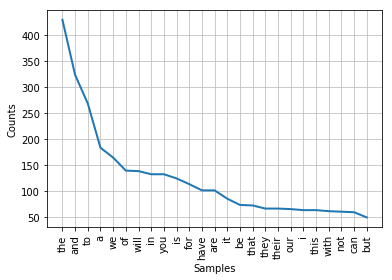

In [23]:
import nltk
Freq_dist_nltk=nltk.FreqDist(new_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## Sopword Removal

They are common words that do not contribute much to the content or meaning of a document. Stopwords add noise to bag-of-words comparisons, so they are usually excluded.

Stopwords are common language words such as articles (a, an, the, etc.) and other tokens that may have less value for searching.

#### Drawbacks:
By removing the stop words we are reducing our ability to perform certain types of searches. Filtering out the words prevents us from doing the following:

- Distinguishing happy from not happy.
- Searching for the band The The.
- Finding Shakespeare’s quotation “To be, or not to be”
- Using the country code for India: IN 

In [24]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
from nltk.tokenize import word_tokenize
words = word_tokenize(speech_text.lower())

In [26]:
wordsFiltered = []
 
for w in words:
    if w not in stopwords:
        wordsFiltered.append(w)

In [27]:
print(wordsFiltered)

['good', 'evening', '.', 'fellow', 'singaporeans', '.', 'busy', 'year', ',', 'home', 'internationally', '.', 'two', 'months', 'ago', ',', 'hosted', 'first', 'ever', 'meeting', 'us', 'president', 'dprk', 'chairman', ',', 'mr', 'donald', 'trump', 'mr', 'kim', 'jong', 'un', '.', 'singapore', 'host', ';', 'involved', 'discussions', '.', 'still', ',', 'big', 'responsibility', 'ensure', 'summit', 'proceeded', 'smoothly', 'safely', '.', 'us', 'dprk', 'choose', 'singapore', 'host', 'summit', '?', 'think', 'considered', 'us', 'serious', 'reliable', 'partner', '.', 'friendly', 'straight', 'parties', '.', 'trusted', 'us', 'infrastructure', 'capability', 'provide', 'safe', 'secure', 'environment', '.', 'daunting', 'task', ',', 'rose', 'challenge', '.', 'welcomed', 'guests', '‘', 'uniquely', 'singapore', '’', 'touches', 'warmth', 'hospitality', '.', 'may', 'seen', 'sentosa', 'cannons', ',', 'barrels', 'decorated', 'flowers', 'olive', 'branches', '.', 'sdc', 'good', 'staff', '.', 'found', 'assigned'

In [28]:
wordsFiltered2 = []
stopWords2 = ['"', "(",")", ".",",", '-',"–", '?', 'more', '=', '$', '/', '%',"立国一代","200,000","2020","’","“","”","99","30","40"]
for w in wordsFiltered:
    if w not in stopWords2:
        wordsFiltered2.append(w)

In [29]:
print(wordsFiltered2)

['good', 'evening', 'fellow', 'singaporeans', 'busy', 'year', 'home', 'internationally', 'two', 'months', 'ago', 'hosted', 'first', 'ever', 'meeting', 'us', 'president', 'dprk', 'chairman', 'mr', 'donald', 'trump', 'mr', 'kim', 'jong', 'un', 'singapore', 'host', ';', 'involved', 'discussions', 'still', 'big', 'responsibility', 'ensure', 'summit', 'proceeded', 'smoothly', 'safely', 'us', 'dprk', 'choose', 'singapore', 'host', 'summit', 'think', 'considered', 'us', 'serious', 'reliable', 'partner', 'friendly', 'straight', 'parties', 'trusted', 'us', 'infrastructure', 'capability', 'provide', 'safe', 'secure', 'environment', 'daunting', 'task', 'rose', 'challenge', 'welcomed', 'guests', '‘', 'uniquely', 'singapore', 'touches', 'warmth', 'hospitality', 'may', 'seen', 'sentosa', 'cannons', 'barrels', 'decorated', 'flowers', 'olive', 'branches', 'sdc', 'good', 'staff', 'found', 'assigned', 'korean-speaking', 'officers', 'north', 'korean', 'delegation', 'packed', 'goodie', 'bags', '2,500', 'i

<FreqDist with 1972 samples and 4925 outcomes>
[('years', 73), ('flats', 54), ('flat', 48), ('singapore', 44), ('hip', 35), ('old', 34), ('hdb', 33), ('new', 30), ('government', 30), ('many', 28), ('us', 27), ('singaporeans', 26), ('one', 26), ('like', 23), ('also', 23), ('housing', 23), ('good', 22), ('would', 22), ('first', 21), ('generation', 20), ('healthcare', 20), ('want', 19), ('time', 18), ('better', 18), ('residents', 18)]


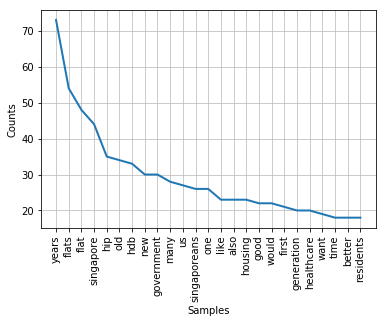

In [30]:
Freq_dist_nltk=nltk.FreqDist(wordsFiltered2)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## Stemming

Stemming work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that this approach presents some limitations.

In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_text=[]
for word in wordsFiltered2:
    stemmed_text.append(ps.stem(word))

In [32]:
stemmed_text[:5]

['good', 'even', 'fellow', 'singaporean', 'busi']

In [33]:
len(stemmed_text)

4925

In [34]:
def wordfreq2(words):
    word_freq={}
    for tok in words:
        if tok in word_freq:
            word_freq[tok] +=1
        else:
            word_freq[tok] =1
    return word_freq
wordfreq2(stemmed_text)

{'good': 22,
 'even': 17,
 'fellow': 1,
 'singaporean': 27,
 'busi': 6,
 'year': 90,
 'home': 11,
 'intern': 6,
 'two': 5,
 'month': 3,
 'ago': 8,
 'host': 5,
 'first': 21,
 'ever': 2,
 'meet': 3,
 'us': 27,
 'presid': 4,
 'dprk': 2,
 'chairman': 1,
 'mr': 4,
 'donald': 1,
 'trump': 3,
 'kim': 2,
 'jong': 1,
 'un': 1,
 'singapor': 44,
 ';': 4,
 'involv': 1,
 'discuss': 2,
 'still': 17,
 'big': 9,
 'respons': 2,
 'ensur': 3,
 'summit': 6,
 'proceed': 3,
 'smoothli': 1,
 'safe': 3,
 'choos': 3,
 'think': 14,
 'consid': 2,
 'seriou': 1,
 'reliabl': 1,
 'partner': 3,
 'friendli': 1,
 'straight': 1,
 'parti': 4,
 'trust': 2,
 'infrastructur': 1,
 'capabl': 1,
 'provid': 3,
 'secur': 2,
 'environ': 5,
 'daunt': 1,
 'task': 1,
 'rose': 1,
 'challeng': 3,
 'welcom': 2,
 'guest': 2,
 '‘': 1,
 'uniqu': 3,
 'touch': 1,
 'warmth': 1,
 'hospit': 4,
 'may': 12,
 'seen': 4,
 'sentosa': 1,
 'cannon': 1,
 'barrel': 1,
 'decor': 1,
 'flower': 1,
 'oliv': 1,
 'branch': 1,
 'sdc': 1,
 'staff': 2,
 'found'

<FreqDist with 1606 samples and 4925 outcomes>
[('flat', 102), ('year', 90), ('singapor', 44), ('gener', 39), ('old', 35), ('hip', 35), ('work', 33), ('hdb', 33), ('govern', 32), ('one', 31), ('new', 30), ('leas', 29), ('mani', 28), ('singaporean', 27), ('us', 27), ('like', 26), ('live', 26), ('hous', 26), ('want', 24), ('also', 23), ('time', 23), ('upgrad', 23), ('start', 23), ('good', 22), ('would', 22)]


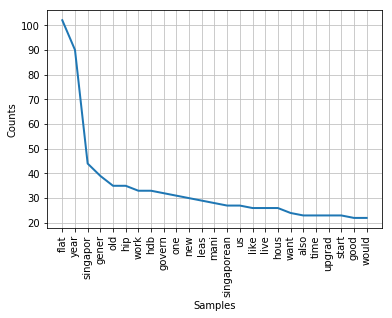

In [38]:
Freq_dist_nltk=nltk.FreqDist(wordfreq2(stemmed_text))
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## Lematization

Lemmatization, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. Again, you can see how it works with the same example words.

Important difference between Stemming and Lematization is that a lemma is the base form of all its inflectional forms, whereas a stem isn’t. This is why regular dictionaries are lists of lemmas, not stems.

In [39]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

ps = PorterStemmer()
wnl = WordNetLemmatizer()
text_lematization_and_stemming=[]
for word in wordsFiltered2:
    text_lematization_and_stemming.append(wnl.lemmatize(word) if wnl.lemmatize(word).endswith('e') else ps.stem(word))

In [40]:
len(text_lematization_and_stemming)

4925

In [41]:
# Only using Lematization
text_lema=[]
for word in wordsFiltered2:
    text_lema.append(wnl.lemmatize(word))

In [42]:
len(text_lema)

text_lema = [w.replace('singapore', 'Singapore') for w in text_lema]
final_text = (" ").join(text_lema)


4925

In [43]:
wordfreq2(text_lema)

{'good': 22,
 'evening': 1,
 'fellow': 1,
 'Singaporean': 27,
 'busy': 2,
 'year': 90,
 'home': 11,
 'internationally': 1,
 'two': 5,
 'month': 3,
 'ago': 8,
 'hosted': 1,
 'first': 21,
 'ever': 2,
 'meeting': 2,
 'u': 27,
 'president': 4,
 'dprk': 2,
 'chairman': 1,
 'mr': 4,
 'donald': 1,
 'trump': 3,
 'kim': 2,
 'jong': 1,
 'un': 1,
 'Singapore': 44,
 'host': 2,
 ';': 4,
 'involved': 1,
 'discussion': 1,
 'still': 17,
 'big': 9,
 'responsibility': 1,
 'ensure': 3,
 'summit': 6,
 'proceeded': 1,
 'smoothly': 1,
 'safely': 1,
 'choose': 3,
 'think': 11,
 'considered': 2,
 'serious': 1,
 'reliable': 1,
 'partner': 3,
 'friendly': 1,
 'straight': 1,
 'party': 4,
 'trusted': 1,
 'infrastructure': 1,
 'capability': 1,
 'provide': 1,
 'safe': 2,
 'secure': 1,
 'environment': 5,
 'daunting': 1,
 'task': 1,
 'rose': 1,
 'challenge': 3,
 'welcomed': 1,
 'guest': 2,
 '‘': 1,
 'uniquely': 2,
 'touch': 1,
 'warmth': 1,
 'hospitality': 1,
 'may': 12,
 'seen': 4,
 'sentosa': 1,
 'cannon': 1,
 'bar

<FreqDist with 1822 samples and 4925 outcomes>
[('flat', 102), ('year', 90), ('Singapore', 44), ('old', 35), ('hip', 35), ('hdb', 33), ('one', 31), ('government', 31), ('new', 30), ('lease', 29), ('many', 28), ('Singaporean', 27), ('u', 27), ('generation', 27), ('like', 23), ('also', 23), ('time', 23), ('housing', 23), ('good', 22), ('want', 22), ('would', 22), ('first', 21), ('life', 21), ('healthcare', 20), ('resident', 20)]


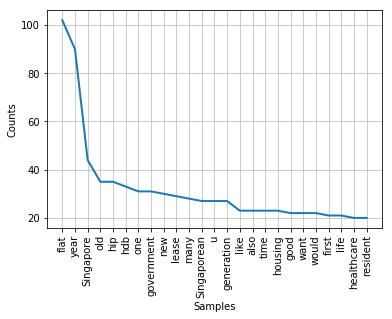

In [44]:
Freq_dist_nltk=nltk.FreqDist(wordfreq2(text_lema))
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## Frequency Table

In [45]:
#Calling the wordfreq2 function which we have already created

Freq_dist_nltk=nltk.FreqDist(wordfreq2(text_lema))
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)

In [46]:
labels = ['Words', 'Frequency']
df = pd.DataFrame.from_records(sorted_d, columns=labels)

### Top 10 Words with high Frequency

In [47]:
df = df.head(10)
df

,Words,Frequency
0,flat,102
1,year,90
2,Singapore,44
3,old,35
4,hip,35
5,hdb,33
6,one,31
7,government,31
8,new,30
9,lease,29


##### From frequency table it is clear that flat and year had the highest frequency of 102 and 90 respectively

## Frequency Distribution Plotted in a Bar Chart

In [48]:
def plot_bar(x_axis, y_axis):
    index = np.arange(len(x_axis))
    plt.barh(x_axis, y_axis, color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
    plt.xlabel('Frequency', fontsize=15)
    plt.ylabel('Words', fontsize=15)
    #plt.xticks(x_axis, y_axis, fontsize=20)
    plt.title('Frequency Distribution of Words', fontsize=20)
    plt.gca().invert_yaxis()
    plt.show()

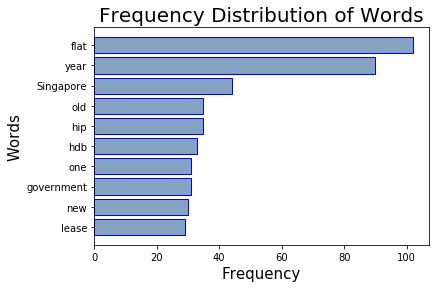

In [49]:
# Plot for the frequency of first 10 words in speech text

plot_bar(df['Words'], df['Frequency'])

## Creating Word Cloud using WordCloud Library

Word clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s). This type of visualization can assist evaluators with exploratory textual analysis by identifying words that frequently appear in a set of interviews, documents, or other text. It can also be used for communicating the most salient points or themes in the reporting stage. 

<Figure size 1008x1008 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

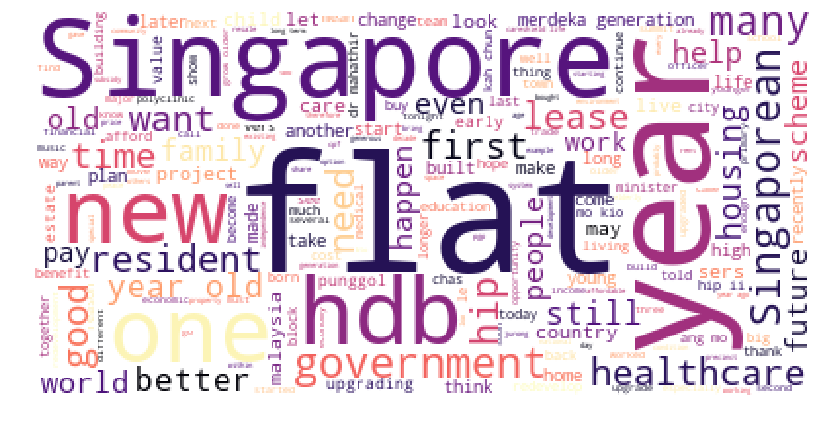

In [64]:
wordcloud = WordCloud(stopwords = set(STOPWORDS), colormap="magma", background_color='white').generate(final_text)
plt.figure(figsize=(14,14),facecolor = 'white', edgecolor='black')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### In the above word cloud it is very evident that flat, year and Singapore had highest frequency hence standing out on the word cloud. The output coincides with the frequency table. However, it is very pleasing for the eyes to see wordcloud and infer meaning out of it.

##### In the National day speech, "Flat" word was used the most as the speech was more towards the housing development and how the people of Singapore are benefitted out of housing development policies.

In [61]:
#Function to mask a image's outline for fitting the wordcloud

def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, colormap="viridis", height = 512,max_font_size=100, max_words=3000, background_color='white', stopwords=STOPWORDS, mask=mask, contour_color="black").generate(words)
    plt.figure(figsize=(20,15),facecolor = 'white', edgecolor='black')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig("Merck_wordcloud.png")
    

    #Function to mask a image's outline for fitting the wordcloud and color the wordcloud based on the original image color

def generate_wordcloud_imageColor(words, mask):

    stopwords = set(STOPWORDS)

    wc = WordCloud(max_words=4000,colormap="CMRmap",mask=mask,background_color='white',
                   stopwords=stopwords, max_font_size=50)
    plt.figure(figsize=(20,15),facecolor = 'white', edgecolor='black')
    wc.generate(words)
    image_colors = ImageColorGenerator(mask)
    plt.imshow(wc, interpolation="bilinear")
    #plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
    plt.axis('off')
    plt.show()

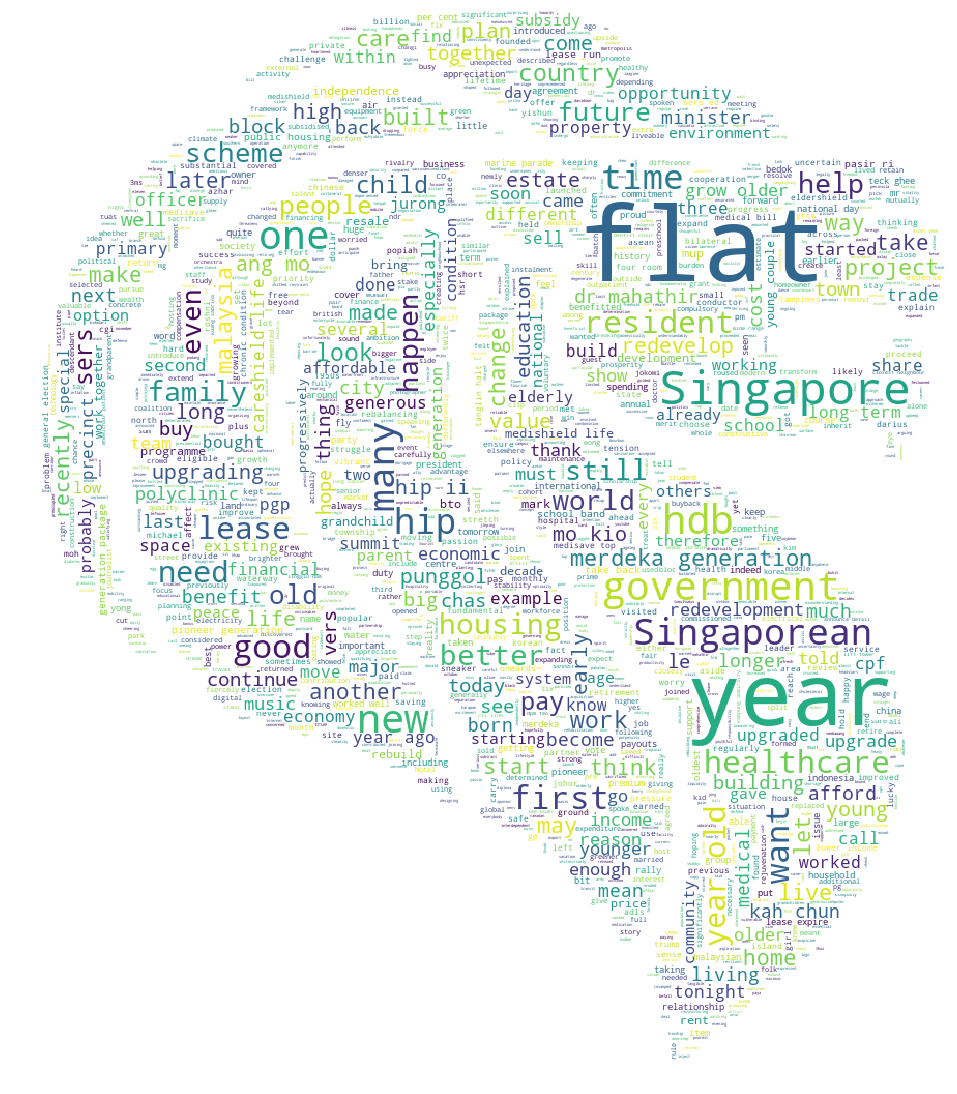

<Figure size 432x288 with 0 Axes>

In [65]:
mask = np.array(Image.open("C:\\Users\\MRAVI\Desktop\\Text Analytics\\merlion.jpg"))
generate_wordcloud(final_text, mask)